# DATA SCIENTIST
**In this tutorial, I only explain you what you need to be a data scientist neither more nor less.**

Data scientist need to have these skills:

1. Basic Tools: Like python, R or SQL. You do not need to know everything. What you only need is to learn how to use **python**
1. Basic Statistics: Like mean, median or standart deviation. If you know basic statistics, you can use **python** easily. 
1. Data Munging: Working with messy and difficult data. Like a inconsistent date and string formatting. As you guess, **python** helps us.
1. Data Visualization: Title is actually explanatory. We will visualize the data with **python** like matplot and seaborn libraries.
1. Machine Learning: You do not need to understand math behind the machine learning technique. You only need is understanding basics of machine learning and learning how to implement it while using **python**.

### As a summary we will learn python to be data scientist !!!

**Content:**
1. [Introduction to Python:](#1)
    1. [Matplotlib](#2)
    1. [Dictionaries ](#3)
    1. [Pandas](#4)
    1. [Logic, control flow and filtering](#5)
    1. [Loop data structures](#6)
1. [Python Data Science Toolbox:](#7)
    1. [User defined function](#8)
    1. [Scope](#9)
    1. [Nested function](#10)
    1. [Default and flexible arguments](#11)
    1. [Lambda function](#12)
    1. [Anonymous function](#13)
    1. [Iterators](#14)
    1. [List comprehension](#15)
1. [Cleaning Data](#16)
    1. [Diagnose data for cleaning](#17)
    1. [Exploratory data analysis](#18)
    1. [Visual exploratory data analysis](#19)
    1. [Tidy data](#20)
    1. [Pivoting data](#21)
    1. [Concatenating data](#22)
    1. [Data types](#23)
    1. [Missing data and testing with assert](#24)
1. [Pandas Foundation](#25)
    1. [Review of pandas](#26)
    1. [Building data frames from scratch](#27)
    1. [Visual exploratory data analysis](#28)
    1. [Statistical explatory data analysis](#29)
    1. [Indexing pandas time series](#30)
    1. [Resampling pandas time series](#31)
1. [Manipulating Data Frames with Pandas](#32)
    1. [Indexing data frames](#33)
    1. [Slicing data frames](#34)
    1. [Filtering data frames](#35)
    1. [Transforming data frames](#36)
    1. [Index objects and labeled data](#37)
    1. [Hierarchical indexing](#38)
    1. [Pivoting data frames](#39)
    1. [Stacking and unstacking data frames](#40)
    1. [Melting data frames](#41)
    1. [Categoricals and groupby](#42)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv


In [2]:
data = pd.read_csv("/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [4]:
data.corr()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,1.000000,0.650719,0.650644,0.650803,0.650714,-0.103926,0.228190,0.650737
Open,0.650719,1.000000,0.999999,0.999999,0.999999,-0.051860,0.344074,0.999999
High,0.650644,0.999999,1.000000,0.999998,0.999999,-0.051717,0.344498,0.999999
Low,0.650803,0.999999,0.999998,1.000000,0.999999,-0.052040,0.343541,1.000000
Close,0.650714,0.999999,0.999999,0.999999,1.000000,-0.051877,0.344036,1.000000
Volume_(BTC),-0.103926,-0.051860,-0.051717,-0.052040,-0.051877,1.000000,0.352038,-0.051887
Volume_(Currency),0.228190,0.344074,0.344498,0.343541,0.344036,0.352038,1.000000,0.344010
Weighted_Price,0.650737,0.999999,0.999999,1.000000,1.000000,-0.051887,0.344010,1.000000


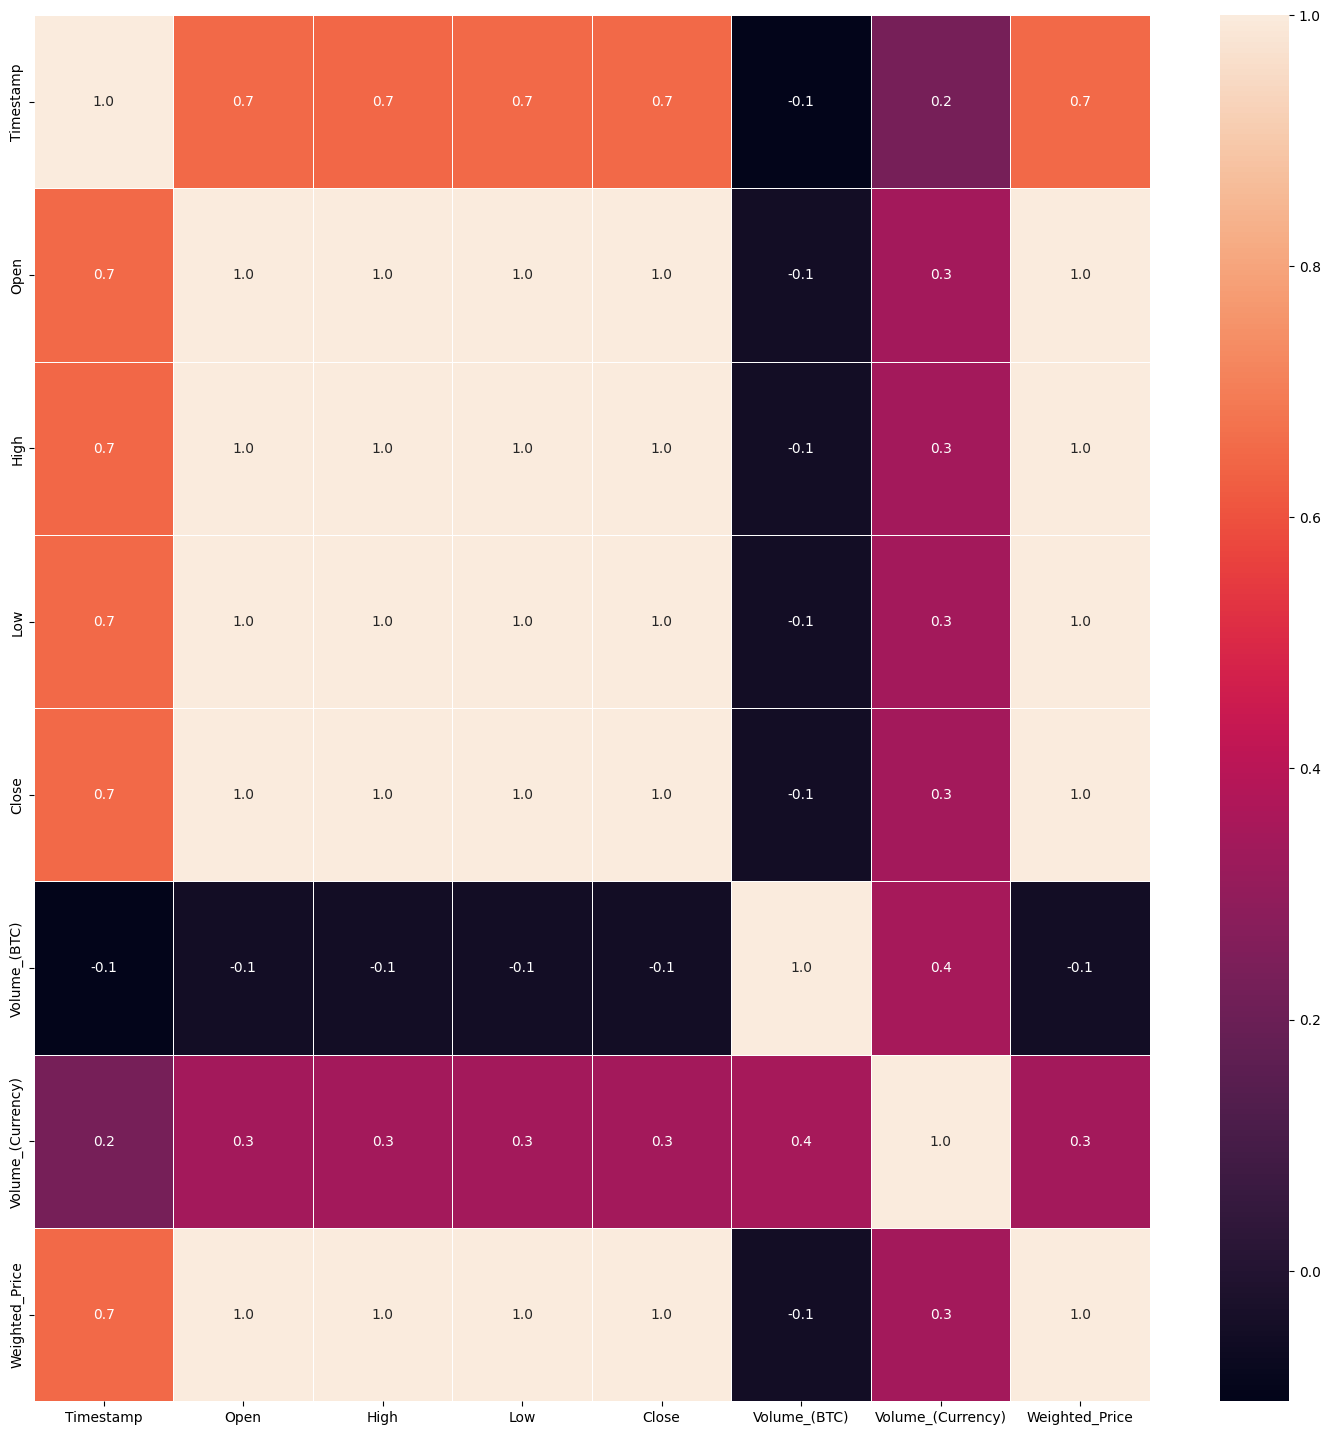

In [5]:
# correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidth=.5, fmt= '.1f',ax=ax)
plt.show()

In [6]:
data.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

# 1. INTRODUCTION TO PYTHON


**MATPLOTLIB**

Matplot is a python library that help us to plot data. The easiest and most basic plots are line, scatter and histogram plots.

Line plot is better when x axis is time.
Scatter is better when there is correlation between two variables
Histogram is better when we need to see distribution of numerical data.
Customization: Colors,labels,thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle

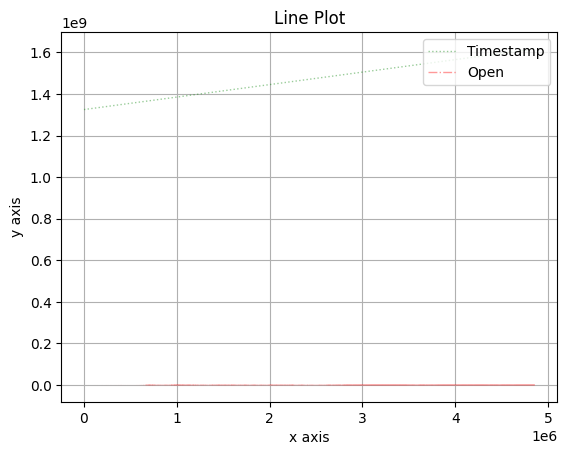

In [8]:
# Line plot
# color = color, label = label, linewidth = width of the line, alpha = opacity, grid = grid, linestyle = style of line
data.Timestamp.plot(kind = 'line', color = 'g', label = 'Timestamp', linewidth=1, alpha=0.4, grid=True, linestyle=':')
data.Open.plot(color = 'r', label = 'Open', linewidth=1, alpha=0.4, grid=True, linestyle='-.')
plt.legend(loc='upper right') # legend = puts label into plot
plt.xlabel('x axis')          # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')        # title = title of plot
plt.show()

Text(0.5, 1.0, 'Low High Scatter Plot')

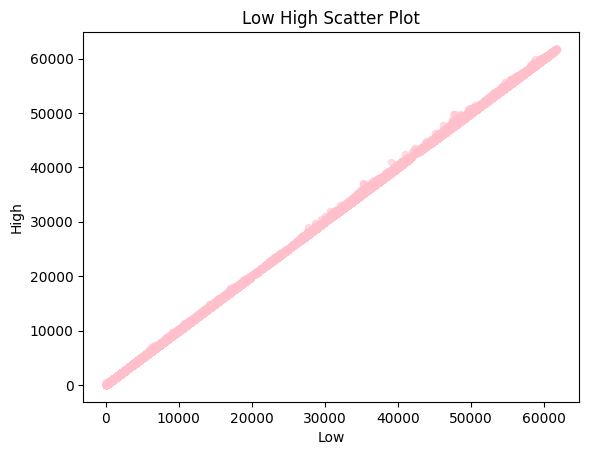

In [9]:
# Scatter plot 
# x = low, y = high
data.plot(kind='scatter', x='Low', y='High', alpha=0.5, color='pink')
plt.xlabel('Low')                          # label = name of the label
plt.ylabel('High')
plt.title('Low High Scatter Plot')        # title = title of plot

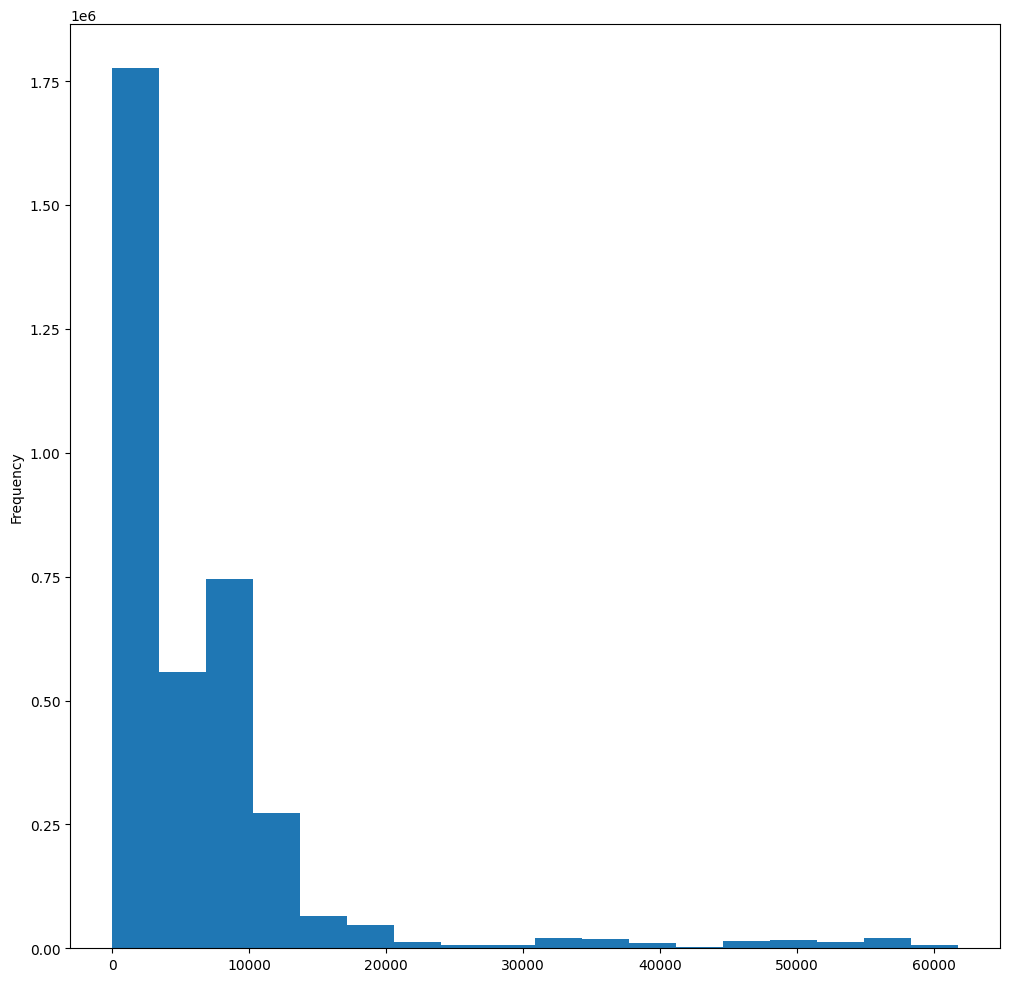

In [10]:
# Histogram
# bins = number of bar in figure
data.Open.plot(kind = 'hist',bins=18, figsize=(12,12))
plt.show()

In [11]:
# clf() = cleans it up again you can start a fresh
data.Open.plot(kind = 'hist', bins=50)
plt.clf()
# We cannot see plot due to clf()

<Figure size 640x480 with 0 Axes>

**DICTIONARY**

Why do we need dictionary?

It has 'key' and 'value'
Faster than lists
What is key and value. Example:
dictionary = {'spain' : 'madrid'}
Key is spain.
Values is madrid.

**It's that easy.** 
Lets practice some other properties like keys(), values(), update, add, check, remove key, remove all entries and remove dicrionary.

In [12]:
# create dictionary and look its key and values
dictionary = {'spain': 'madrid', 'usa':'vegas'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])


In [13]:
# Keys have to be immutable objects like string, boolean, float, integer or tubles
# List is not immutable
# Keys are unique
dictionary['spain'] = "barcelona"      # update existing entry
print(dictionary)
dictionary['france'] = "paris"         # add new entry
print(dictionary)
del dictionary['spain']                # remove entry with key 'spain'
print(dictionary)
print('france' in dictionary)          # check include or not
dictionary.clear()                     # remove all entries in dict
print(dictionary)

{'spain': 'barcelona', 'usa': 'vegas'}
{'spain': 'barcelona', 'usa': 'vegas', 'france': 'paris'}
{'usa': 'vegas', 'france': 'paris'}
True
{}


In [14]:
# In order to run all code you need to take comment this line
#del dictionary         # delete entire dictionary     
print(dictionary)       # it gives error because dictionary is deleted

{}


**PANDAS**

What do we need to know about pandas?

CSV: comma - separated values

In [15]:
data = pd.read_csv("/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [16]:
series = data['Open']           # data['Open'] = series
print(type(series))
data_frame = data[['Open']]     # data[['Open']] = data frame
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Before continuing with pandas, we need to learn logic, control flow and filtering. 

Comparison operator: ==, <, >, <= 

Boolean operators: and, or ,not 

Filtering pandas


In [17]:
# Comparision operator
print(3>2)
print(3!=2)
# Boolean operators
print(True and False)
print(True or False)

True
True
False
True


In [18]:
# 1 - Filtering Pandas data frame
x = data['Open']>61000    # Filters the Bitcoin historical data to find rows where the 'Open' price is greater than 61000; there are 467 such rows
data[x]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4832668,1615666320,61034.74,61143.55,61011.21,61120.00,5.014562,306191.696030,61060.503543
4832669,1615666380,61153.11,61224.73,61117.24,61199.43,4.638432,283755.187870,61174.811745
4832670,1615666440,61199.43,61222.03,61085.69,61114.57,6.089384,372298.735920,61138.979124
4832671,1615666500,61114.57,61278.71,61061.99,61254.91,6.462134,395511.175370,61204.417775
4832672,1615666560,61256.66,61351.00,61231.00,61297.71,11.171952,684677.506340,61285.397559
...,...,...,...,...,...,...,...,...
4833488,1615715520,61010.85,61033.81,60998.00,61022.64,0.865988,52826.193832,61001.088125
4833489,1615715580,61022.64,61042.97,61019.73,61042.97,0.882370,53854.788517,61034.215864
4833490,1615715640,61042.97,61071.12,61031.72,61031.72,3.497203,213546.273960,61062.025043
4833491,1615715700,61047.39,61054.81,60998.00,61012.51,2.100374,128151.372940,61013.596203


In [19]:
# 2 - Filtering pandas with logical_and
# There are only 368 pokemons who have higher Open value than 61000 and higher High value than 61100
data[np.logical_and(data['Open']>61000, data['High']>61100 )]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4832668,1615666320,61034.74,61143.55,61011.21,61120.00,5.014562,306191.696030,61060.503543
4832669,1615666380,61153.11,61224.73,61117.24,61199.43,4.638432,283755.187870,61174.811745
4832670,1615666440,61199.43,61222.03,61085.69,61114.57,6.089384,372298.735920,61138.979124
4832671,1615666500,61114.57,61278.71,61061.99,61254.91,6.462134,395511.175370,61204.417775
4832672,1615666560,61256.66,61351.00,61231.00,61297.71,11.171952,684677.506340,61285.397559
...,...,...,...,...,...,...,...,...
4833239,1615700580,61097.43,61118.27,61092.33,61097.63,0.781343,47738.287835,61097.774452
4833241,1615700700,61073.09,61103.93,61073.09,61091.66,2.178199,133085.423540,61098.838834
4833242,1615700760,61095.33,61102.78,61063.65,61075.58,5.799408,354196.533770,61074.602872
4833253,1615701420,61081.04,61101.81,61017.90,61059.78,5.213913,318316.328050,61051.326723


In [20]:
# This is also same with previous code line. Therefore we can also use '&' for filtering.
data[(data['Open']>61000) & (data['High']>61100)]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4832668,1615666320,61034.74,61143.55,61011.21,61120.00,5.014562,306191.696030,61060.503543
4832669,1615666380,61153.11,61224.73,61117.24,61199.43,4.638432,283755.187870,61174.811745
4832670,1615666440,61199.43,61222.03,61085.69,61114.57,6.089384,372298.735920,61138.979124
4832671,1615666500,61114.57,61278.71,61061.99,61254.91,6.462134,395511.175370,61204.417775
4832672,1615666560,61256.66,61351.00,61231.00,61297.71,11.171952,684677.506340,61285.397559
...,...,...,...,...,...,...,...,...
4833239,1615700580,61097.43,61118.27,61092.33,61097.63,0.781343,47738.287835,61097.774452
4833241,1615700700,61073.09,61103.93,61073.09,61091.66,2.178199,133085.423540,61098.838834
4833242,1615700760,61095.33,61102.78,61063.65,61075.58,5.799408,354196.533770,61074.602872
4833253,1615701420,61081.04,61101.81,61017.90,61059.78,5.213913,318316.328050,61051.326723


****WHILE and FOR LOOPS****

****We will learn the most basic while and for loops****

In [21]:
# Stay in loop if condition( i is not equal 5) is true
i = 0
while i!=5 :
    print('i is: ',i)
    i+=1
print(i, 'is equal to 5')

i is:  0
i is:  1
i is:  2
i is:  3
i is:  4
5 is equal to 5


In [22]:
# Stay in loop if condition( i is not equal 5) is true
lis = [1,2,3,4,5]
for i in lis:
    print('i is: ',i)
print('')

# Enumarate index and value of list
# index : value = 0:1, 1:2, 2:3, 3:4, 4:5
for index, value in enumerate(lis):
    print(index,":", value)
print('')

# For dictionaries
# We can use for loop to achive key and value of dictionary. We learnt key and value at dictionary part.
dictionary = {'spain':'madrid','france':'paris'}
for key, value in dictionary.items():
    print(key, " : ",value)
print('')

# For pandas we can achieve index and value
for index, value in data[['Open']][0:1].iterrows():
    print(index," : ",value)

i is:  1
i is:  2
i is:  3
i is:  4
i is:  5

0 : 1
1 : 2
2 : 3
3 : 4
4 : 5

spain  :  madrid
france  :  paris

0  :  Open    4.39
Name: 0, dtype: float64


In this part, you learn:

* how to import csv file
* plotting line,scatter and histogram
* basic dictionary features
*  basic pandas features like filtering that is actually something always used and main for being data scientist
* While and for loops

# 2. PYTHON DATA SCIENCE TOOLBOX


USER DEFINED FUNCTION

What do we need to know about functions:

* docstrings: documentation for functions. Example: 
for f(): 
"""This is docstring for documentation of function f"""
* tuple: sequence of immutable python objects. 
cant modify values 
tuple uses paranthesis like tuble = (1,2,3) 
unpack tuple into several variables like a,b,c = tuple

In [23]:
# example of what we learn above
def tuple_ex():
    """ return defined t tuple """
    t = (1,2,3)
    return t
a,b,c = tuple_ex()
print(a,b,c)

1 2 3


<a id="9"></a> <br>
### SCOPE
What we need to know about scope:
* global: defined main body in script
* local: defined in a function
* built in scope: names in predefined built in scope module such as print, len
<br><br>Lets make some basic examples

In [24]:
# guess print what
x = 2
def f():
    x = 3
    return x
print(x)     # x = 2 global scope
print(f())   # x = 3 local scope

2
3


In [25]:
# what if there is no local scope
x = 5
def f():
    y = 2*x     # there is no local scope x
    return y 
print(f())      # it uses global scope x
# First local scope searched, then global scope seaarched, if two of them cannot be found lastly built in scope searched.

10


In [26]:
# How can be learn what is built in scope
import builtins 
dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EncodingWarning',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIt

<a id="10"></a> <br>
### NESTED FUNCTION
* function inside function.
* There is a LEGB rule that is search local scope, enclosing function, global and built in scopes, respectively.

In [27]:
# nested funtion
def square():
    """ return square of value """
    def add():
        """ add to local variable """
        x = 2
        y = 3
        z = x + y
        return z
    return add()**2
print(square())

25


<a id="11"></a> <br>
### DEFAULT and FLEXIBLE ARGUMENTS
* Default argument example:
<br> def f(a, b=1):
        """ b = 1 is default argument"""
* Flexible argument example:
<br> def f(*args):
       """ *args can be one or more"""
<br>def f(** kwargs)
       """ **kwargs is a dictionary"""
       
<br><br> lets write some code to practice  

In [28]:
# default arguments 
def f(a, b=1, c=2):
    y = a+b+c
    return y
print(f(5))
# what if we want to change default arguments 
print(f(5,4,3))

8
12


In [29]:
# flexible arguments *args
def f(*args):
    for i in args:
        print(i)
f(1)
print("")
f(1,2,3,4)
# flexible arguments **kwargs that is dictionary
def f(**kwargs):
    """print key and value of dictionary"""
    for key,value in kwargs.items():       # # If you do not understand this part turn for loop part and look at dictionary in for loop
        print(key, "", value)
f(country ='spain', capital='madrid', population=123456)

1

1
2
3
4
country  spain
capital  madrid
population  123456


**LAMBDA FUNCTION**

Faster way of writing function

In [30]:
# lambda function
square = lambda x:x**2       # where x is name of argument
print(square(4))
tot = lambda x,y,z: x+y+z    # where x,y,z name of argument
print(tot(1,2,3))

16
6


<a id="13"></a> <br>
### ANONYMOUS FUNCTİON
Like lambda function but it can take more than one arguments.
* map(func,seq) : applies a function to all the items in a list

In [31]:
number_list = [1,2,3]
y = map(lambda x:x**2,number_list)
print(list(y))

[1, 4, 9]


<a id="14"></a> <br>
### ITERATORS
* iterable is an object that can return an iterator
* iterable: an object with an associated iter() method
<br> example: list, strings and dictionaries
* iterator: produces next value with next() method

In [32]:
# iteration examples
name = "tugcesandikli"
it = iter(name)
print(next(it))       # print next iteration 
print(*it)            # print remaining iteration

t
u g c e s a n d i k l i


zip(): zip lists

In [33]:
# zip example
list1= [1,2,3,4]
list2= [5,6,7,8]
z = zip(list1,list2)
print(z)
z_list = list(z)
print(z_list)

[(1, 5), (2, 6), (3, 7), (4, 8)]


In [34]:
un_zip = zip(*z_list)
un_list1,un_list2 = list(un_zip)   # unzip returns tuble
print(un_list1)
print(un_list2)
print(type(un_list2))
print(type(list(un_list1)))

(1, 2, 3, 4)
(5, 6, 7, 8)
<class 'tuple'>
<class 'list'>


<a id="15"></a> <br>
### LIST COMPREHENSİON
**One of the most important topic of this kernel**
<br>We use list comprehension for data analysis often. 
<br> list comprehension: collapse for loops for building lists into a single line
<br>Ex: num1 = [1,2,3] and we want to make it num2 = [2,3,4]. This can be done with for loop. However it is  unnecessarily long. We can make it one line code that is list comprehension.

In [35]:
# Example of list comprehension
num1 = [1,2,3]
num2 = [i + 1 for i in num1]     # list comprehension 
print(num2)

[2, 3, 4]


[i + 1 for i in num1 ]: list of comprehension
<br> i +1: list comprehension syntax
<br> for i in num1: for loop syntax
<br> i: iterator
<br> num1: iterable object

In [36]:
# Conditionals on iterable
num1 = [5,10,15]
num2 = [i**2 if i == 10 else i-5 if i < 7 else i+5 for i in num1]
print(num2)

[0, 100, 20]


In [37]:
# Lets return bitcoin csv and make one more list comprehension example
# Lets classify bitcoin whether they have high or low open level. Our treshold is average open level.
threshold = sum(data.Open)/len(data.Open)
print("threshold",threshold)
data["open_level"] = ["high" if i > threshold else "low" for i in data.Open]
data.loc[:10,["open_level","Open"]] # we will learn loc more detailed later

threshold nan


,open_level,Open
0,low,4.39
1,low,NaN
2,low,NaN
3,low,NaN
4,low,NaN
5,low,NaN
6,low,NaN
7,low,NaN
8,low,NaN
9,low,NaN


<a id="16"></a> <br>
# 3.CLEANING DATA

<a id="17"></a> <br>
### DIAGNOSE DATA for CLEANING
We need to diagnose and clean data before exploring.
<br>Unclean data:
* Column name inconsistency like upper-lower case letter or space between words
* missing data
* different language

<br> We will use head, tail, columns, shape and info methods to diagnose data

In [38]:
data = pd.read_csv("/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
data.head()     # head show first 5 rows

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# tail show last 5 rows
data.tail()      

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [40]:
# columns gives columns names of features
data.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [41]:
# shape gives number of rows and columns in a tuble
data.shape

(4857377, 8)

In [42]:
# info gives data type like dataframe, number of sample or row, number of feature or column, feature types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


<a id="18"></a> <br>
### EXPLORATORY DATA ANALYSIS
value_counts(): Frequency counts
<br>outliers: the value that is considerably higher or lower from rest of the data
* Lets say value at 75% is Q3 and value at 25% is Q1. 
* Outlier are smaller than Q1 - 1.5(Q3-Q1) and bigger than Q3 + 1.5(Q3-Q1). (Q3-Q1) = IQR
<br>We will use describe() method. Describe method includes:
* count: number of entries
* mean: average of entries
* std: standart deviation
* min: minimum entry
* 25%: first quantile
* 50%: median or second quantile
* 75%: third quantile
* max: maximum entry

<br> What is quantile?

* 1,4,5,6,8,9,11,12,13,14,15,16,17
* The median is the number that is in **middle** of the sequence. In this case it would be 11.

* The lower quartile is the median in between the smallest number and the median i.e. in between 1 and 11, which is 6.
* The upper quartile, you find the median between the median and the largest number i.e. between 11 and 17, which will be 14 according to the question above.

In [43]:
# For example lets look frequency of unique values in the 'Open' column
print(data['Open'].value_counts(dropna=False)) # if there are nan values that also be counted

Open
NaN         1243608
580.00          622
450.00          622
635.00          568
448.00          562
             ...   
3902.54           1
3908.54           1
3908.36           1
3912.09           1
58767.75          1
Name: count, Length: 1059733, dtype: int64


In [44]:
(1,2,3,4,200)

(1, 2, 3, 4, 200)

In [45]:
# For example max Open is 8.996247e+03	or min close 1.500000e+00	
data.describe()      # ignore null entries

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


<a id="19"></a> <br>
### VISUAL EXPLORATORY DATA ANALYSIS
* Box plots: visualize basic statistics like outliers, min/max or quantiles

In [46]:
# For example: compare value of bitcoin values that are open or close
# Black line at top is max
# Blue line at top is 75%
# Green line is median (50%)
# Blue line at bottom is 25%
# Black line at bottom is min
# There are no outliers
# data.boxplot(column='Open',by='Close')      # Because it took too long to work, it is in the comment section

<a id="20"></a> <br>
### TIDY DATA
We tidy data with melt().
Describing melt is confusing. Therefore lets make example to understand it.

In [47]:
# Firstly I create new data from bitcoins data to explain melt nore easily.
data_new = data.head()     # I only take 5 rows into new data
data_new

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# lets melt
# id_vars = what we do not wish to melt 
# value_vars = what we want to melt 
melted = pd.melt(frame=data_new,id_vars = 'Timestamp',value_vars=['High','Low'])
melted

,Timestamp,variable,value
0,1325317920,High,4.39
1,1325317980,High,NaN
2,1325318040,High,NaN
3,1325318100,High,NaN
4,1325318160,High,NaN
5,1325317920,Low,4.39
6,1325317980,Low,NaN
7,1325318040,Low,NaN
8,1325318100,Low,NaN
9,1325318160,Low,NaN


<a id="21"></a> <br>
### PIVOTING DATA
Reverse of melting.

In [49]:
# Index is timestamp
# I want to make that columns are variable
# Finally values in columns are value 
melted.pivot(index = 'Timestamp', columns = 'variable',values='value')

variable,High,Low
Timestamp,,
1325317920,4.39,4.39
1325317980,NaN,NaN
1325318040,NaN,NaN
1325318100,NaN,NaN
1325318160,NaN,NaN


<a id="22"></a> <br>
### CONCATENATING DATA
We can concatenate two dataframe 

In [50]:
# Firstly lets create 2 data frame
data1 = data.head()
data2 = data.tail()
conc_data_row = pd.concat([data1,data2],axis=0,ignore_index=True)    # axis = 0 : adds dataframes in row
conc_data_row

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
6,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
7,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
8,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
9,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [51]:
data1 = data['High'].head()
data2 = data['Low'].head()
con_data_col = pd.concat([data1,data2],axis=1)   # axis = 1 : adds dataframes in column
con_data_col

,High,Low
0,4.39,4.39
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


**DATA TYPES**

There are 5 basic data types: object(string),boolean, integer, float and categorical. 
We can make conversion data types like from str to categorical or from int to float 
Why is category important:

* make dataframe smaller in memory
* can be utilized for anlaysis especially for sklearn(we will learn later)

In [52]:
data.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [53]:
# lets convert float to categorical and int to float.
data['Open'] = data['Open'].astype('category')
data['Timestamp'] = data['Timestamp'].astype('float')

In [54]:
# As you can see Open is converted from float to categorical
# And Timestamp ,s converted from int to float
data.dtypes

Timestamp             float64
Open                 category
High                  float64
Low                   float64
Close                 float64
Volume_(BTC)          float64
Volume_(Currency)     float64
Weighted_Price        float64
dtype: object

<a id="24"></a> <br>
### MISSING DATA and TESTING WITH ASSERT
If we encounter with missing data, what we can do:
* leave as is
* drop them with dropna()
* fill missing value with fillna()
* fill missing values with test statistics like mean
<br>Assert statement: check that you can turn on or turn off when you are done with your testing of the program

In [55]:
# Lets check High
data["Low"].value_counts(dropna =False)
# As you can see, there are 1243608 NAN value

Low
NaN         1243608
580.00          689
620.00          684
448.00          664
570.00          657
             ...   
3883.29           1
3883.60           1
3882.46           1
3883.50           1
58755.97          1
Name: count, Length: 1046537, dtype: int64

In [56]:
# Lets drop nan values
data1=data   # also we will use data to fill missing value so I assign it to data1 variable
data1["Low"].dropna(inplace = True)  # inplace = True means we do not assign it to new variable. Changes automatically assigned to data
# So does it work ?

In [57]:
#  Lets check with assert statement
# Assert statement:
assert 1==1 # return nothing because it is true

In [58]:
# In order to run all code, we need to make this line comment
# assert 1==2 # return error because it is false

In [59]:
# # With assert statement we can check a lot of thing. For example
# assert data.columns[1] == 'Name'
assert data.High.dtypes == np.float64

In this part, you learn:
* Diagnose data for cleaning
* Exploratory data analysis
* Visual exploratory data analysis
* Tidy data
* Pivoting data
* Concatenating data
* Data types
* Missing data and testing with assert

<a id="25"></a> <br>
# 4. PANDAS FOUNDATION 

<a id="26"></a> <br>
### REVİEW of PANDAS
As you notice, I do not give all idea in a same time. Although, we learn some basics of pandas, we will go deeper in pandas.
* single column = series
* NaN = not a number
* dataframe.values = numpy

<a id="27"></a> <br>
### BUILDING DATA FRAMES FROM SCRATCH
* We can build data frames from csv as we did earlier.
* Also we can build dataframe from dictionaries
    * zip() method: This function returns a list of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables.
* Adding new column
* Broadcasting: Create new column and assign a value to entire column

In [60]:
# data frames from dictionary
country = ["France","Italy"]
population = ["12","18"]
list_label = ["country","population"]
list_col = [country,population]
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

,country,population
0,France,12
1,Italy,18


In [61]:
# add new columns
df["capital"] = ["paris","rome"]
df

,country,population,capital
0,France,12,paris
1,Italy,18,rome


In [62]:
# Broadcasting
df["income"] = 0  # Broadcasting entire columns
df

,country,population,capital,income
0,France,12,paris,0
1,Italy,18,rome,0


<a id="28"></a> <br>
### VISUAL EXPLORATORY DATA ANALYSIS
* Plot
* Subplot
* Histogram:
    * bins: number of bins
    * range(tuble): min and max values of bins
    * normed(boolean): normalize or not
    * cumulative(boolean): compute cumulative distribution

<Axes: >

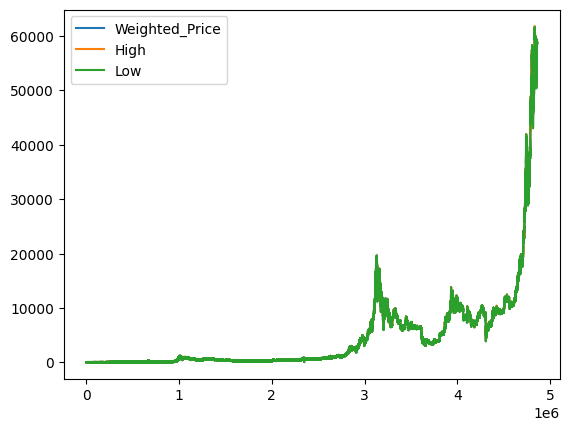

In [63]:
# Plotting all data
data1 = data.loc[:,["Weighted_Price","High","Low"]]
data1.plot()
# it is confusing

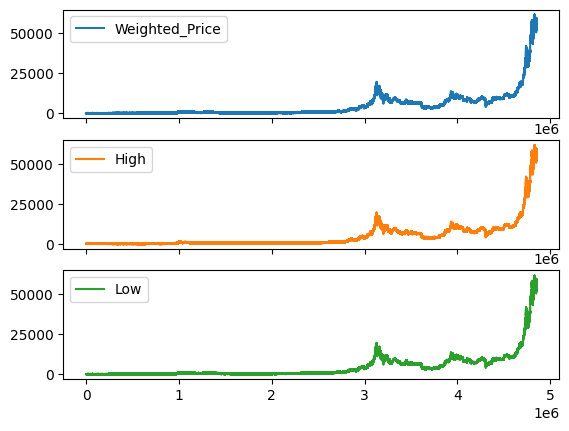

In [64]:
# subplots
data1.plot(subplots = True)
plt.show()

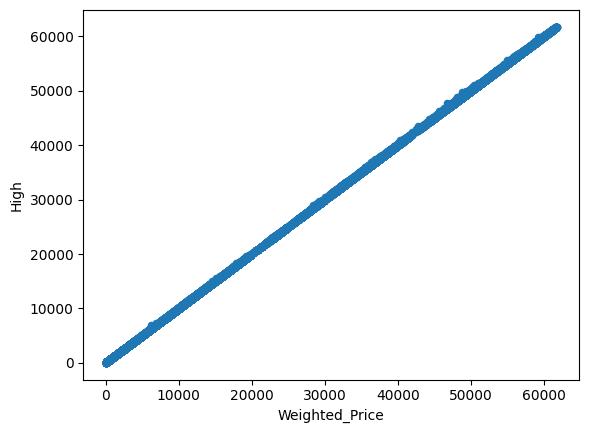

In [65]:
# scatter plot
data1.plot(kind = "scatter", x="Weighted_Price", y="High")
plt.show()

<Axes: ylabel='Frequency'>

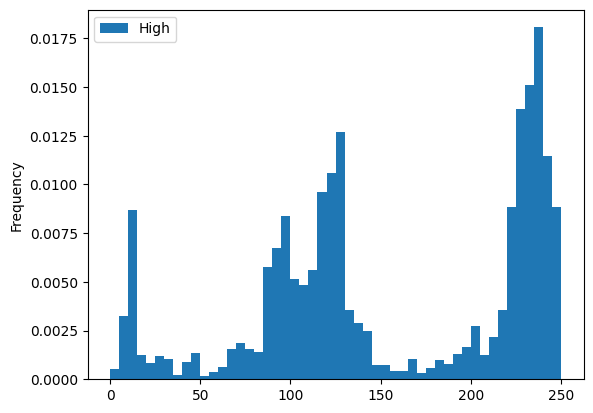

In [66]:
# hist plot
data1.plot(kind = "hist", y = "High",bins = 50,range= (0,250),density = True)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

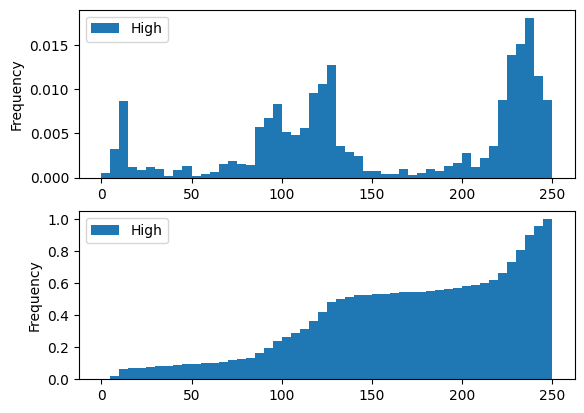

In [67]:
# histogram subplot with non cumulative and cumulative
fig, axes = plt.subplots(nrows=2, ncols=1)
data1.plot(kind= "hist", y="High", bins=50, range=(0,250), density=True, ax=axes[0])
data1.plot(kind= "hist", y="High", bins=50, range=(0,250), density=True, ax=axes[1], cumulative=True)
plt.savefig('graph.png')
plt

<a id="29"></a> <br>
### STATISTICAL EXPLORATORY DATA ANALYSIS
I already explained it at previous parts. However lets look at one more time.
* count: number of entries
* mean: average of entries
* std: standart deviation
* min: minimum entry
* 25%: first quantile
* 50%: median or second quantile
* 75%: third quantile
* max: maximum entry

In [68]:
data.describe()

,Timestamp,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


<a id="30"></a> <br>
### INDEXING PANDAS TIME SERIES
* datetime = object
* parse_dates(boolean): Transform date to ISO 8601 (yyyy-mm-dd hh:mm:ss ) format

In [69]:
time_list = ["2001-08-05","2008-08-08"]
print(type(time_list[1]))    # As you can see date is string
# however we want it to be datetime object
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [70]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1.325318e+09,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# close warning
import warnings
warnings.filterwarnings("ignore")
# in order the practice lets take head of bitcoin data and add it a time list
data2 = data.head()
date_list = ["2005-06-06","1975-05-18","1993-10-23","2005-12-30","1964-08-02"]
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object
# lets make date as index
data2= data2.set_index("date")
data2

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
date,,,,,,,,
2005-06-06,1.325318e+09,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1975-05-18,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-10-23,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-30,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-08-02,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# Now we can select according to our date index
print(data2.loc["2005-06-06"])

Timestamp            1.325318e+09
Open                 4.390000e+00
High                 4.390000e+00
Low                  4.390000e+00
Close                4.390000e+00
Volume_(BTC)         4.555809e-01
Volume_(Currency)    2.000000e+00
Weighted_Price       4.390000e+00
Name: 2005-06-06 00:00:00, dtype: float64


<a id="31"></a> <br>
### RESAMPLING PANDAS TIME SERIES
* Resampling: statistical method over different time intervals
    * Needs string to specify frequency like "M" = month or "A" = year
* Downsampling: reduce date time rows to slower frequency like from daily to weekly
* Upsampling: increase date time rows to faster frequency like from daily to hourly
* Interpolate: Interpolate values according to different methods like ‘linear’, ‘time’ or index’ 
    * https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.interpolate.html

<a id="32"></a> <br>
# 5.MANIPULATING DATA FRAMES WITH PANDAS

<a id="33"></a> <br>
### INDEXING DATA FRAMES
* Indexing using square brackets
* Using column attribute and row label
* Using loc accessor
* Selecting only some columns

In [73]:
# indexing using square brackets
data["High"][0]

4.39

In [74]:
# using column attribute and row label
data.High[0]

4.39

In [75]:
# using loc accessor
data.loc[0,["High"]]

High    4.39
Name: 0, dtype: float64

In [76]:
# selecting only some columns 
data[["High","Low"]]

,High,Low
0,4.39,4.39
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
4857372,58714.31,58686.00
4857373,58693.43,58683.97
4857374,58723.84,58693.43
4857375,58770.38,58742.18


<a id="34"></a> <br>
### SLICING DATA FRAME
* Difference between selecting columns
    * Series and data frames
* Slicing and indexing series
* Reverse slicing 
* From something to end

In [77]:
# Difference between selecting columns: series and dataframes 
print(type(data["High"]))    # series
print(type(data[["High"]]))  # dataframe

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [78]:
# Slicing and indexing series
data.loc[1:10,"Open":"Close"]    # 10 and "Close" are inclusive

,Open,High,Low,Close
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN


In [79]:
# Reverse slicing 
data.loc[10:1:-1,"Open":"Close"]

,Open,High,Low,Close
10,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN


In [80]:
# From something to end
data.loc[1:10,"High":]

,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN


<a id="35"></a> <br>
### FILTERING DATA FRAMES
Creating boolean series
Combining filters
Filtering column based others

In [81]:
# Creating boolean series
boolean = data.High > 200
data[boolean]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
669822,1.365507e+09,200.34,200.80,200.34,200.34,5.380000,1080.099735,200.762032
669823,1.365507e+09,200.34,200.80,200.34,200.80,4.278005,858.279678,200.626161
669824,1.365507e+09,200.80,200.80,200.80,200.80,2.402750,482.472256,200.800000
669825,1.365507e+09,200.80,200.98,200.80,200.98,2.350603,472.024167,200.809831
669826,1.365507e+09,201.00,201.00,201.00,201.00,7.350000,1477.350000,201.000000
...,...,...,...,...,...,...,...,...
4857372,1.617149e+09,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1.617149e+09,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1.617149e+09,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1.617149e+09,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [82]:
# Combining Filters
first_filter = data.Close > 300
second_filter = data.Low > 20
data[first_filter & second_filter]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
976189,1.383889e+09,300.01,300.20,300.01,300.20,19.970000,5994.728959,300.186728
976190,1.383889e+09,300.20,301.88,300.20,301.88,46.900000,14103.943095,300.723733
976191,1.383889e+09,300.20,302.01,300.00,302.01,58.341350,17600.935491,301.688862
976192,1.383889e+09,302.01,302.09,302.01,302.09,2.000000,604.109590,302.054795
976193,1.383890e+09,302.09,302.13,302.09,302.13,13.975195,4221.936189,302.102135
...,...,...,...,...,...,...,...,...
4857372,1.617149e+09,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1.617149e+09,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1.617149e+09,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1.617149e+09,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [83]:
# Filtering column based others
data.High[data.Low < 40]

0            4.39
478          4.39
547          4.57
548          4.58
1224         4.58
            ...  
628989      38.36
628990      40.50
628992      43.48
628994      42.29
2349652    588.53
Name: High, Length: 39067, dtype: float64

<a id="36"></a> <br>
### TRANSFORMING DATA
* Plain python functions
* Lambda function: to apply arbitrary python function to every element
* Defining column using other columns

In [84]:
# Plain python functions
def div(n):
    return n/20000
data.High.apply(div)

0          0.000219
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
4857372    2.935715
4857373    2.934671
4857374    2.936192
4857375    2.938519
4857376    2.938909
Name: High, Length: 4857377, dtype: float64

In [85]:
# Or we can use lambda function
data.High.apply(lambda n : n/20000)

0          0.000219
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
4857372    2.935715
4857373    2.934671
4857374    2.936192
4857375    2.938519
4857376    2.938909
Name: High, Length: 4857377, dtype: float64

In [86]:
# Defining column using other columns
data["total"] = data.Low + data.High
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,total
0,1.325318e+09,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,8.78
1,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="37"></a> <br>
### INDEX OBJECTS AND LABELED DATA
index: sequence of label


In [87]:
# our index name is this:
print(data.index.name)
# lets change it
data.index.name = "index_name"
data.head()

None


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,total
index_name,,,,,,,,,
0,1.325318e+09,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,8.78
1,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# Overwrite index
# if we want to modify index we need to change all of them.
data.head()
# first copy of our data to data3 then change index 
data3 = data.copy()
# lets make index start from 100. It is not remarkable change but it is just example
data3.index = range(100,4857477,1)
data3.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,total
100,1.325318e+09,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,8.78
101,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,1.325318e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="38"></a> <br>
### HIERARCHICAL INDEXING
* Setting indexing

In [89]:
# lets read data frame one more time to start from beginning
data = pd.read_csv("/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
data.head()
# As you can see there is index. However we want to set one or more column to be index

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# Setting index : high is outer low is inner index
data1 = data.set_index(["High","Low"]) 
data1.head(100)

Timestamp  Open  Close  Volume_(BTC)  Volume_(Currency)  \
High     Low                                                                  
4.39     4.39      1325317920  4.39   4.39      0.455581                2.0   
NaN      NaN       1325317980   NaN    NaN           NaN                NaN   
         NaN       1325318040   NaN    NaN           NaN                NaN   
         NaN       1325318100   NaN    NaN           NaN                NaN   
         NaN       1325318160   NaN    NaN           NaN                NaN   
...                       ...   ...    ...           ...                ...   
         NaN       1325323620   NaN    NaN           NaN                NaN   
         NaN       1325323680   NaN    NaN           NaN                NaN   
         NaN       1325323740   NaN    NaN           NaN                NaN   
         NaN       1325323800   NaN    NaN           NaN                NaN   
         NaN       1325323860   NaN    NaN           NaN                NaN   

                   Weighted_Price  
High     Low                       
4.39     4.39                4.39  
NaN      NaN                  NaN  
         NaN                  NaN  
         NaN                  NaN  
         NaN                  NaN  
...                           ...  
         NaN                  NaN  
         NaN                  NaN  
         NaN                  NaN  
         NaN                  NaN  
         NaN                  NaN  

[100 rows x 6 columns]

<a id="39"></a> <br>
### PIVOTING DATA FRAMES
* pivoting: reshape tool

In [91]:
dic = {"treatment":["T","T","S","S"],"gender":["F","M","F","M"],"response":[10,45,5,9],"age":[15,4,72,65]}
df = pd.DataFrame(dic)
df

,treatment,gender,response,age
0,T,F,10,15
1,T,M,45,4
2,S,F,5,72
3,S,M,9,65


In [92]:
# pivoting
df.pivot(index="treatment", columns="gender", values="response")

gender,F,M
treatment,,
S,5,9
T,10,45


<a id="40"></a> <br>
### STACKING and UNSTACKING DATAFRAME
* deal with multi label indexes
* level: position of unstacked index
* swaplevel: change inner and outer level index position

In [93]:
df1 = df.set_index(["treatment","gender"])
df1
# lets unstack in

response  age
treatment gender               
T         F             10   15
          M             45    4
S         F              5   72
          M              9   65

In [94]:
# level determines indexes
df1.unstack(level=0)

response     age    
treatment        S   T   S   T
gender                        
F                5  10  72  15
M                9  45  65   4

In [95]:
df1.unstack(level=1)

response     age    
gender           F   M   F   M
treatment                     
S                5   9  72  65
T               10  45  15   4

In [96]:
# change inner and outer level index position
df2 = df1.swaplevel(0,1)
df2

,,response,age
gender,treatment,,
F,T,10,15
M,T,45,4
F,S,5,72
M,S,9,65


<a id="41"></a> <br>
### MELTING DATA FRAMES
* Reverse of pivoting

In [97]:
df

,treatment,gender,response,age
0,T,F,10,15
1,T,M,45,4
2,S,F,5,72
3,S,M,9,65


In [98]:
# df.pivot(index="treatment",columns = "gender",values="response")
pd.melt(df,id_vars="treatment",value_vars=["age","response"])

,treatment,variable,value
0,T,age,15
1,T,age,4
2,S,age,72
3,S,age,65
4,T,response,10
5,T,response,45
6,S,response,5
7,S,response,9


<a id="42"></a> <br>
### CATEGORICALS AND GROUPBY

In [99]:
# We will use df
df

,treatment,gender,response,age
0,T,F,10,15
1,T,M,45,4
2,S,F,5,72
3,S,M,9,65


In [100]:
# we can only choose one of the feature
df.groupby("treatment").age.max() 

treatment
S    72
T    15
Name: age, dtype: int64

In [101]:
# Or we can choose multiple features
df.groupby("treatment")[["age","response"]].min() 

,age,response
treatment,,
S,65,5
T,4,10


In [102]:
df.info()
# as you can see gender is object
# However if we use groupby, we can convert it categorical data. 
# Because categorical data uses less memory, speed up operations like groupby
#df["gender"] = df["gender"].astype("category")
#df["treatment"] = df["treatment"].astype("category")
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   treatment  4 non-null      object
 1   gender     4 non-null      object
 2   response   4 non-null      int64 
 3   age        4 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 256.0+ bytes
